In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTTools import get_subHn_by_semantic_boundary

from IPython.display import Image, display

parser = load_parser()

simpson_dir = "pictures/simpson/"

In [2]:
def instantiate_hs(hn, vertex, name, boundary=""):
    def _next(next_hs):
#         start_hs = hn.hypernetwork[vertex]
        hn.hypernetwork[vertex].remove_from_boundary(boundary)
        
        for name in hn.hypernetwork[next_hs].simplex:
            _next(name)

        hn.hypernetwork[vertex].remove_from_boundary(boundary)

    _next(vertex) 

## Body boundary

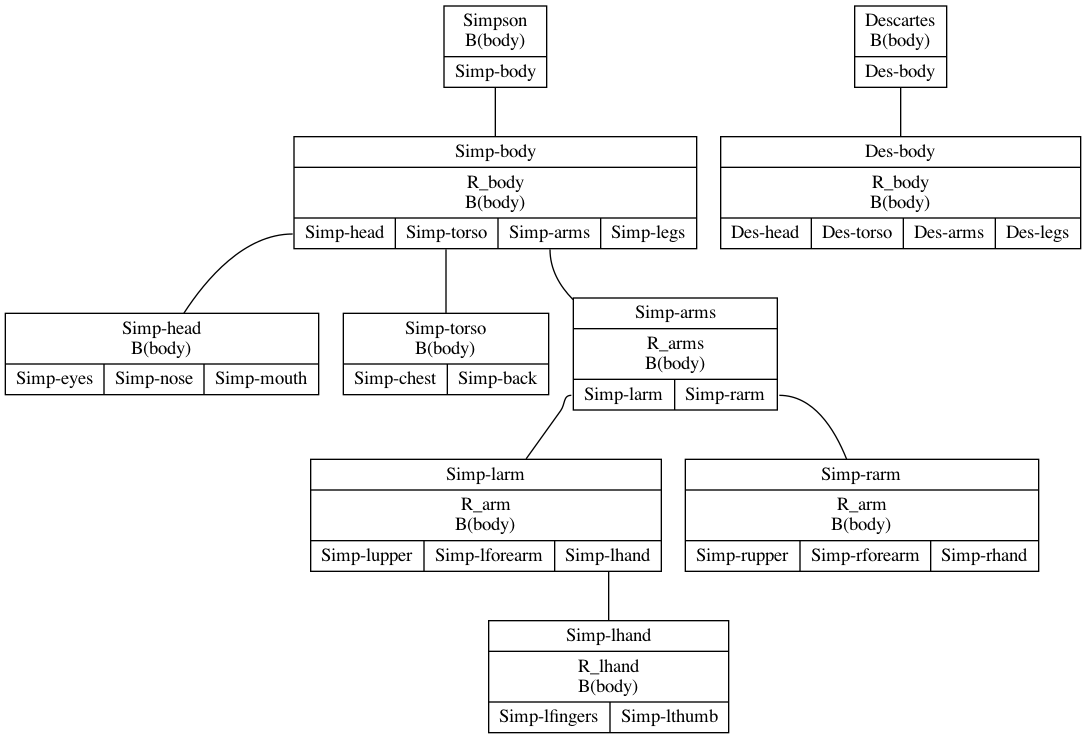

In [3]:
bodies_hn = Hypernetwork()

compile_hn(bodies_hn, parser, """
    Simpson=U<Simp-body; B(body)>
    Descartes=U<Des-body; B(body)>
    
    Simp-body=<Simp-head, Simp-torso, Simp-arms=<Simp-larm, Simp-rarm; R_arms>, Simp-legs; R_body; B(body)>
    Simp-head=<Simp-eyes, Simp-nose, Simp-mouth>
    Simp-torso=<Simp-chest, Simp-back>
    Simp-larm=<Simp-lupper, Simp-lforearm, Simp-lhand; R_arm; B(body)>
    Simp-lhand=<Simp-lfingers, Simp-lthumb; R_lhand>
    Simp-rarm=<Simp-rupper, Simp-rforearm, Simp-rhand; R_arm; B(body)>

    Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>
""")

draw_hn(bodies_hn, fname=simpson_dir+"bodies", view=False, show_vertex=False)
Image(filename=simpson_dir+'bodies.png', width=800, height=400)

## Philosophy Department

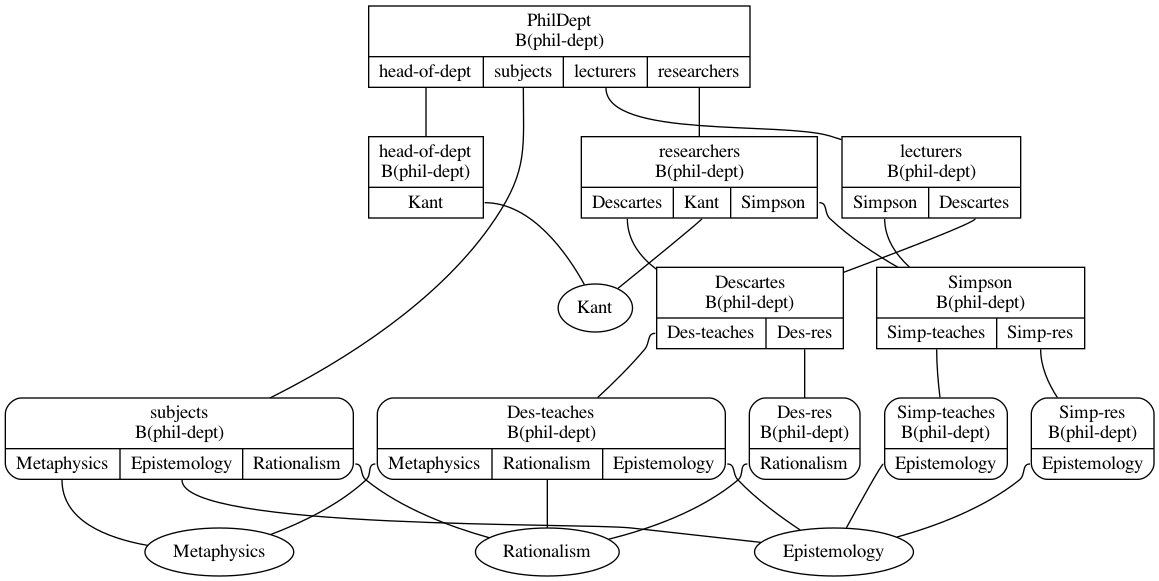

In [4]:
phil_dept_hn = Hypernetwork()

compile_hn(phil_dept_hn, parser, """
    PhilDept=<head-of-dept=<Kant>, subjects, lecturers=<Simpson, Descartes>, researchers=<Descartes, Kant, Simpson>; B(phil-dept)>
    subjects={Metaphysics, Epistemology, Rationalism; B(phil-dept)}
    
    Simpson=U<Simp-teaches={Epistemology}, Simp-res={Epistemology}; B(phil-dept)>
    Descartes=U<Des-teaches={Metaphysics, Rationalism, Epistemology}, Des-res={Rationalism}; B(phil-dept)>
""")

draw_hn(phil_dept_hn, fname=simpson_dir+"phil-dept", view=False, show_vertex=False)
Image(filename=simpson_dir+'phil-dept.png', width=800, height=400)

## Union and exclusions

Simpson=<Simp-body, Simp-teaches, Simp-res; B(body, phil-dept)>^N
Simp-body=<Simp-head, Simp-torso, Simp-arms, Simp-legs; R_body; B(body)>^N
Descartes=<Des-body, Des-teaches, Des-res; B(body, phil-dept)>^N
Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>^N
Simp-arms=<Simp-larm, Simp-rarm; R_arms; B(body)>^N
Simp-larm=<Simp-lupper, Simp-lforearm, Simp-lhand; R_arm; B(body)>^N
Simp-rarm=<Simp-rupper, Simp-rforearm, Simp-rhand; R_arm; B(body)>^N
Simp-head=<Simp-eyes, Simp-nose, Simp-mouth; B(body)>^N
Simp-torso=<Simp-chest, Simp-back; B(body)>^N
Simp-lhand=<Simp-lfingers, Simp-lthumb; R_lhand; B(body)>^N
head-of-dept=<Kant; B(phil-dept)>^N
lecturers=<Simpson, Descartes; B(phil-dept)>^N
Simp-teaches={Epistemology; B(phil-dept)}^N
Simp-res={Epistemology; B(phil-dept)}^N
Des-teaches={Metaphysics, Rationalism, Epistemology; B(phil-dept)}^N
Des-res={Rationalism; B(phil-dept)}^N
researchers=<Descartes, Kant, Simpson; B(phil-dept)>^N
PhilDept=<head-of-dept, subjects, lecturers

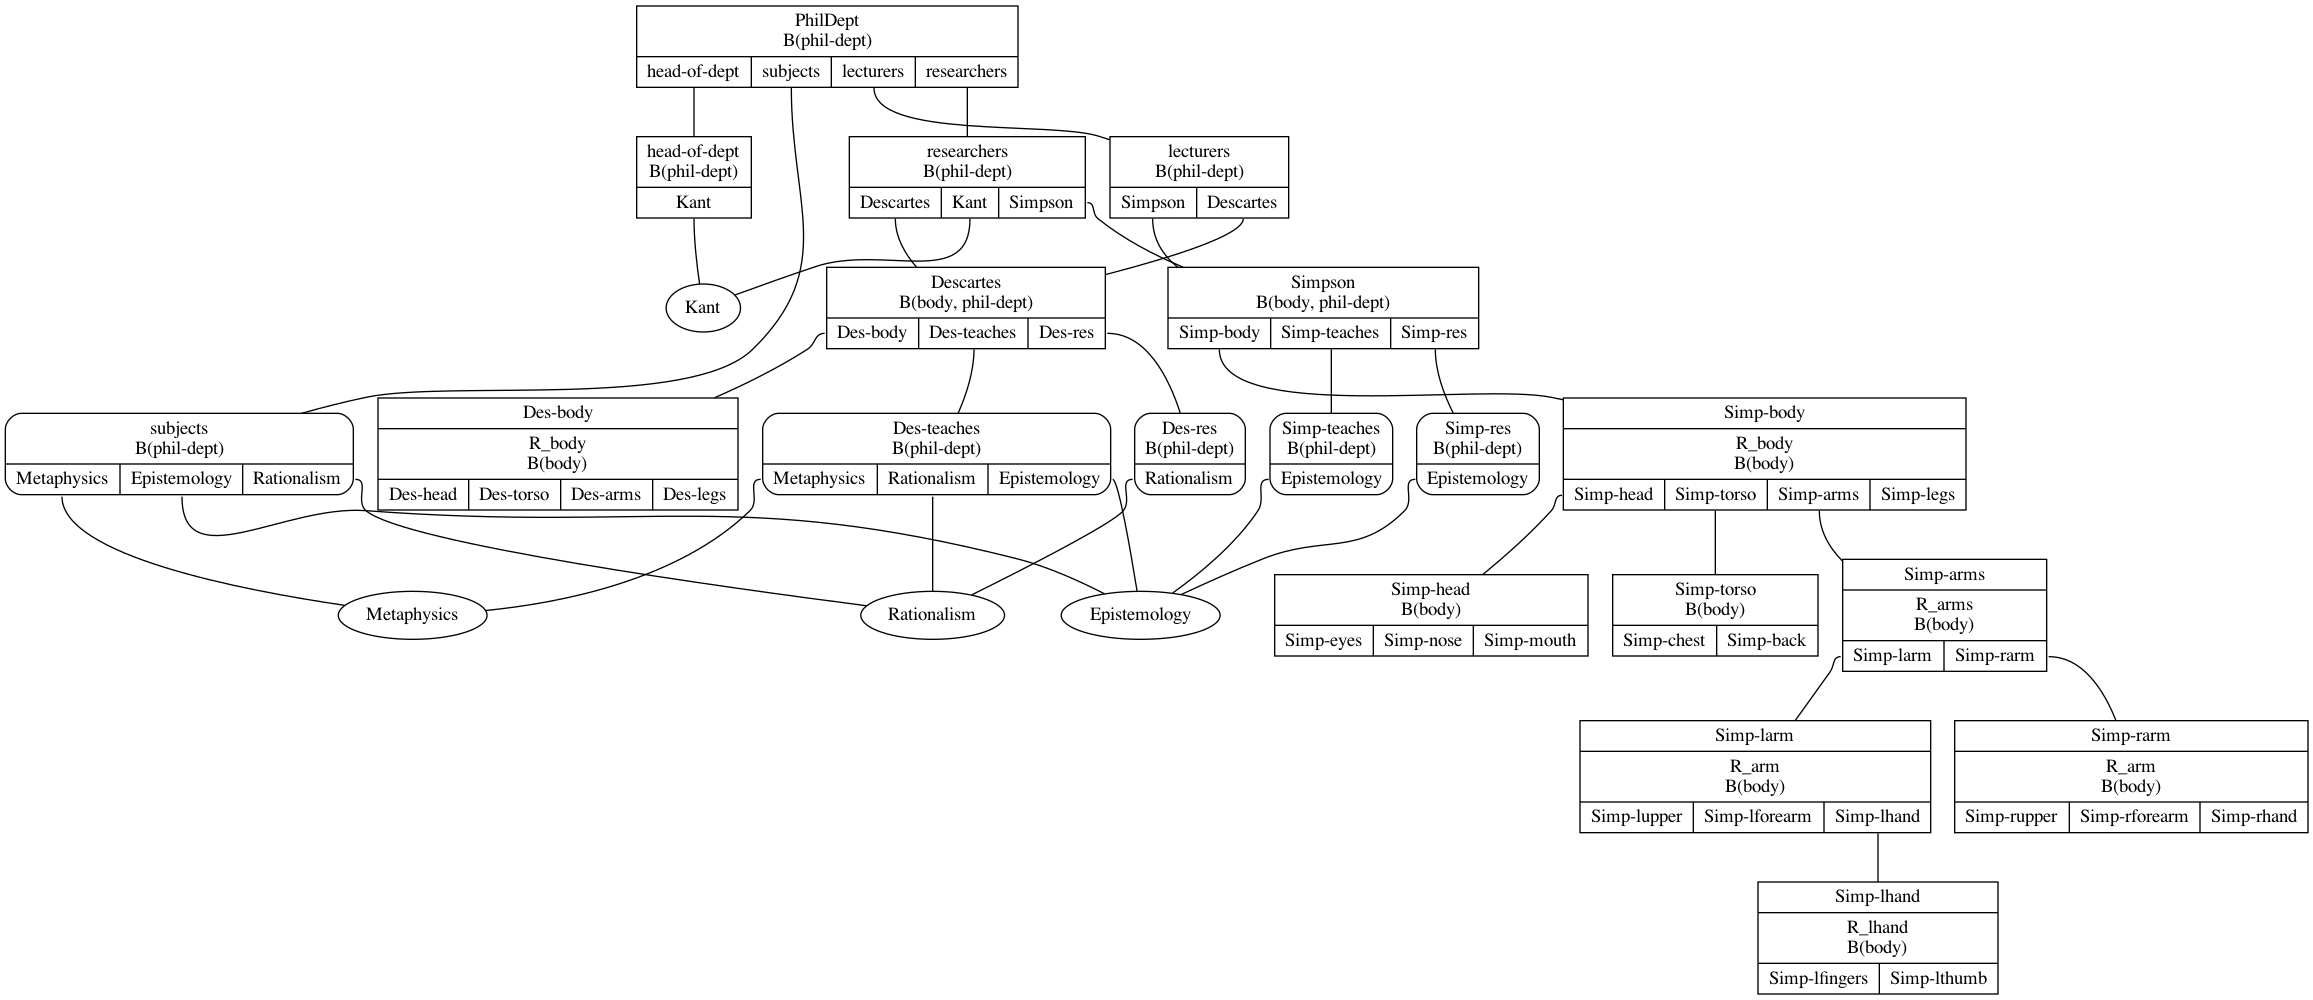

In [5]:
simpson_hn = Hypernetwork()

simpson_hn.copy(bodies_hn)
simpson_hn.union(phil_dept_hn)

simpson_hn.remove_from_boundary("Simp-body", "phil-dept")
simpson_hn.remove_from_boundary("Des-body", "phil-dept")
simpson_hn.remove_from_boundary("Simp-teaches", "body")
simpson_hn.remove_from_boundary("Simp-res", "body")
simpson_hn.remove_from_boundary("Des-teaches", "body")
simpson_hn.remove_from_boundary("Des-res", "body")
# simpson_hn.remove_from_boundary("Simp-arms", "die")

print(simpson_hn)

draw_hn(simpson_hn, fname=simpson_dir+"simpson", view=False, show_vertex=False)
Image(filename=simpson_dir+'simpson.png', width=1500, height=400)

## Difference

Simpson=<Simp-body, Simp-teaches, Simp-res; B(body, phil-dept)>^N
Simp-body=<Simp-head, Simp-torso, Simp-arms, Simp-legs; R_body; B(body)>^N
Simp-head=<Simp-eyes, Simp-nose, Simp-mouth; B(body)>^N
Simp-torso=<Simp-chest, Simp-back; B(body)>^N
Simp-arms=<Simp-larm, Simp-rarm; R_arms; B(body)>^N
Descartes=<Des-body, Des-teaches, Des-res; B(body, phil-dept)>^N
Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>^N
Simp-larm=<Simp-lupper, Simp-lforearm, Simp-lhand; R_arm; B(body)>^N
Simp-rarm=<Simp-rupper, Simp-rforearm, Simp-rhand; R_arm; B(body)>^N
Simp-lhand=<Simp-lfingers, Simp-lthumb; R_lhand; B(body)>^N



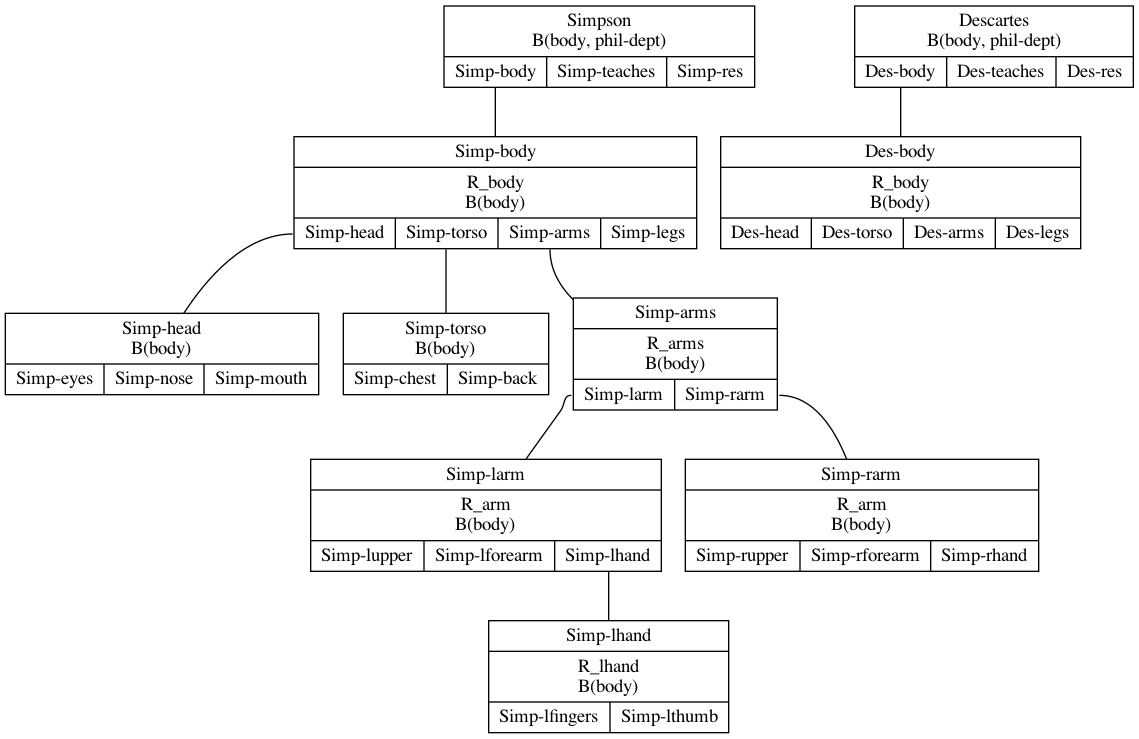

In [6]:
body_hn = Hypernetwork()
body_hn = get_subHn_by_semantic_boundary(simpson_hn, "body", body_hn)

print(body_hn)

draw_hn(body_hn, fname=simpson_dir+"simpson-body", view=False, show_vertex=False, )
Image(filename=simpson_dir+'simpson-body.png', width=800, height=400)

Simpson=<Simp-body, Simp-teaches, Simp-res; B(body, phil-dept)>^N
Simp-teaches={Epistemology; B(phil-dept)}^N
Simp-res={Epistemology; B(phil-dept)}^N
Descartes=<Des-body, Des-teaches, Des-res; B(body, phil-dept)>^N
Des-teaches={Metaphysics, Rationalism, Epistemology; B(phil-dept)}^N
Des-res={Rationalism; B(phil-dept)}^N
head-of-dept=<Kant; B(phil-dept)>^N
lecturers=<Simpson, Descartes; B(phil-dept)>^N
researchers=<Descartes, Kant, Simpson; B(phil-dept)>^N
PhilDept=<head-of-dept, subjects, lecturers, researchers; B(phil-dept)>^N
subjects={Metaphysics, Epistemology, Rationalism; B(phil-dept)}^N



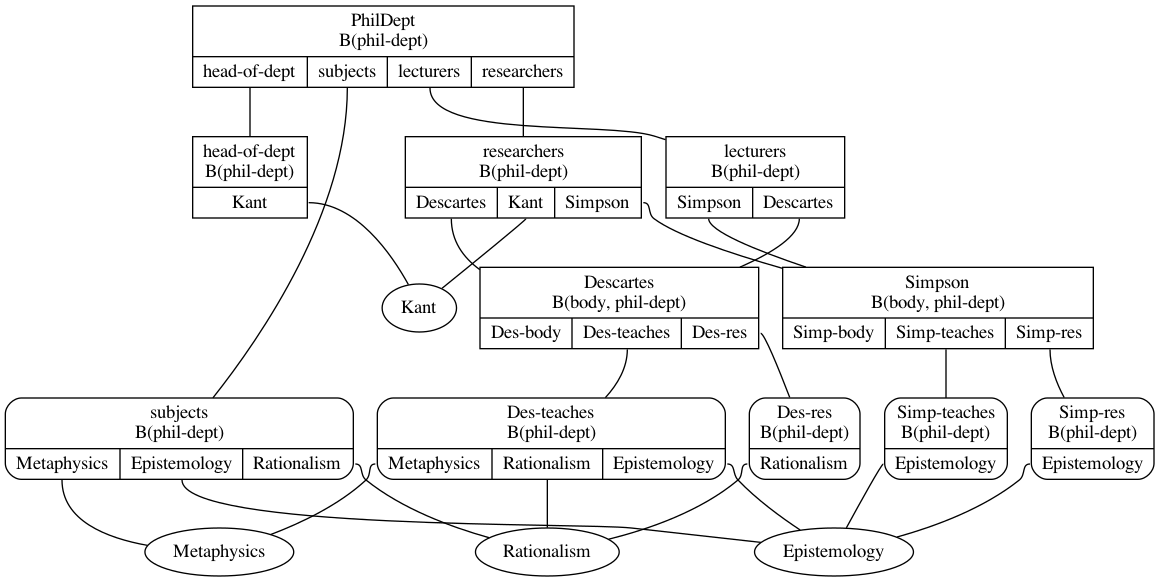

In [7]:
phil_dept_hn2 = Hypernetwork()
phil_dept_hn2 = get_subHn_by_semantic_boundary(simpson_hn, "phil-dept", phil_dept_hn2)

print(phil_dept_hn2)

draw_hn(phil_dept_hn2, fname=simpson_dir+"simpson-phil-dept2", view=False, show_vertex=False)
Image(filename=simpson_dir+'simpson-phil-dept2.png', width=800, height=400)

## Intersection

Simpson=<Simp-body, Simp-teaches, Simp-res; B(body, phil-dept)>^N
Descartes=<Des-body, Des-teaches, Des-res; B(body, phil-dept)>^N



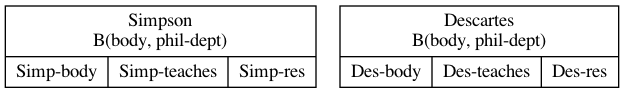

In [8]:
isec_hn = body_hn.intersection(phil_dept_hn2)

print(isec_hn)

draw_hn(isec_hn, fname=simpson_dir+"simpson-isec", view=False, show_vertex=False)
Image(filename=simpson_dir+'simpson-isec.png', width=500, height=400)

## Delete

Simpson=<Simp-body, Simp-teaches, Simp-res; B(body, phil-dept)>^N
Simp-body=<Simp-head, Simp-torso, Simp-arms, Simp-legs; R_body; B(body)>^N
Descartes=<Des-body, Des-teaches, Des-res; B(body, phil-dept)>^N
Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>^N
Simp-arms=<Simp-rarm; R_arms; B(body)>^N
Simp-rarm=<Simp-rupper, Simp-rforearm, Simp-rhand; R_arm; B(body)>^N
Simp-head=<Simp-eyes, Simp-nose, Simp-mouth; B(body)>^N
Simp-torso=<Simp-chest, Simp-back; B(body)>^N
head-of-dept=<Kant; B(phil-dept)>^N
lecturers=<Simpson, Descartes; B(phil-dept)>^N
Simp-teaches={Epistemology; B(phil-dept)}^N
Simp-res={Epistemology; B(phil-dept)}^N
Des-teaches={Metaphysics, Rationalism, Epistemology; B(phil-dept)}^N
Des-res={Rationalism; B(phil-dept)}^N
researchers=<Descartes, Kant, Simpson; B(phil-dept)>^N
PhilDept=<head-of-dept, subjects, lecturers, researchers; B(phil-dept)>^N
subjects={Metaphysics, Epistemology, Rationalism; B(phil-dept)}^N



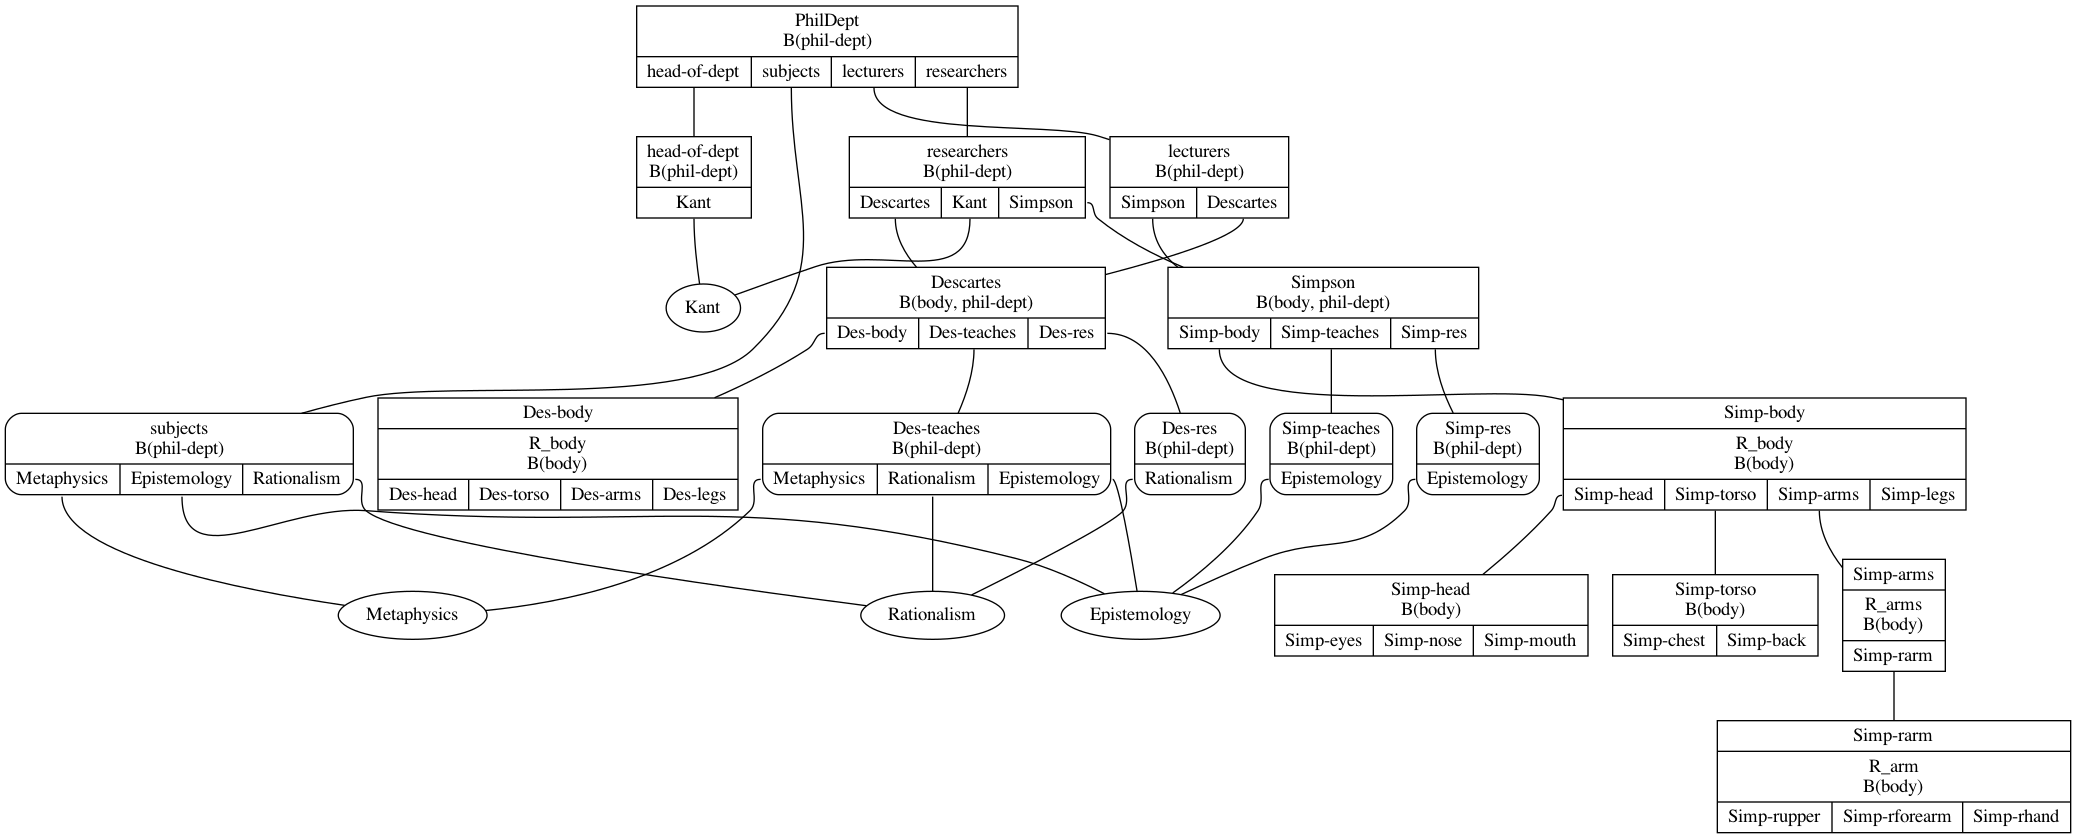

In [9]:
simpson_armless_hn = Hypernetwork()
simpson_armless_hn.copy(simpson_hn)
simpson_armless_hn.delete("Simp-larm", B="body")

print(simpson_armless_hn)

draw_hn(simpson_armless_hn, fname=simpson_dir+"simpson-armless-hn", view=False, show_vertex=False)
Image(filename=simpson_dir+'simpson-armless-hn.png', width=1400, height=400)

Simpson=<Simp-teaches, Simp-res; B(phil-dept)>^N
Descartes=<Des-body, Des-teaches, Des-res; B(body, phil-dept)>^N
Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>^N
head-of-dept=<Kant; B(phil-dept)>^N
lecturers=<Descartes; B(phil-dept)>^N
Simp-teaches={Epistemology; B(phil-dept)}^N
Simp-res={Epistemology; B(phil-dept)}^N
Des-teaches={Metaphysics, Rationalism, Epistemology; B(phil-dept)}^N
Des-res={Rationalism; B(phil-dept)}^N
researchers=<Descartes, Kant; B(phil-dept)>^N
PhilDept=<head-of-dept, subjects, lecturers, researchers; B(phil-dept)>^N
subjects={Metaphysics, Epistemology, Rationalism; B(phil-dept)}^N



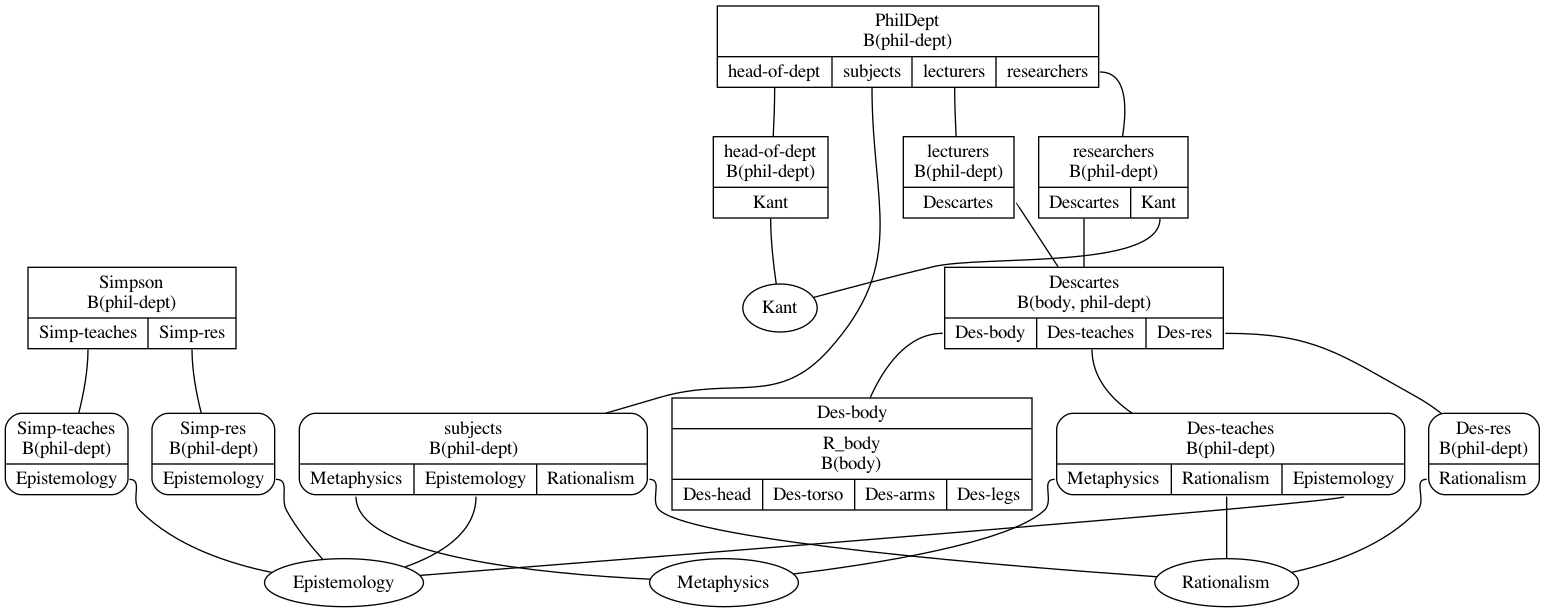

In [10]:
simpson_leaves_hn = Hypernetwork()
simpson_leaves_hn.copy(simpson_hn)
simpson_leaves_hn.delete("Simpson", B="body")

print(simpson_leaves_hn)

draw_hn(simpson_leaves_hn, fname=simpson_dir+"simpson-leaves-hn", view=False, show_vertex=False)
Image(filename=simpson_dir+'simpson-leaves-hn.png', width=1000, height=400)

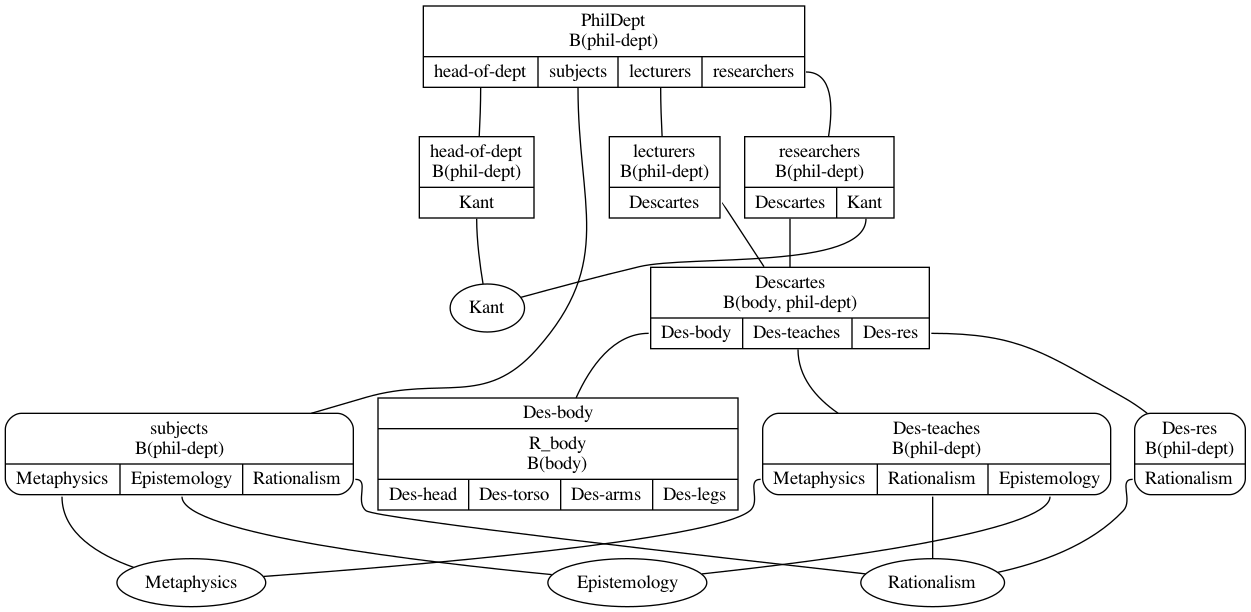

In [11]:
simpson_leaves_hn.delete("Simpson", B="phil-dept")

draw_hn(simpson_leaves_hn, fname=simpson_dir+"simpson-leaves-2", view=False, show_vertex=False)
Image(filename=simpson_dir+'simpson-leaves-2.png', width=1000, height=400)

In [12]:
hn = Hypernetwork()

compile_hn(hn, parser, """
    A=<a1, a2, a3; R>
    B=<b1, b2; R>
    C=<c1, c2, c3; R>
    
    a1=<a1.1, a2.1, a2.2, a3.1, c1.1, c1.2; R>
    a2=<a1.1, a2.2, a3.1, b1.2; R>
    a3=<a1.1, a3.1; R>
    
    b1=<b1.1, b1.2; R>
    b2=<a2.1, b2.1, b2.2, b1.1; R>
    
    c1=<c1.1, c1.2, c2.1; R>
    c2=<c2.1, c2.2, c3.1; R>
    c3=<c3.1, c3.2; R>
""")

# print(hn)

# draw_hn(hn, fname="pictures/boundary-hn", view=False)
# Image(filename='pictures/boundary-hn.png', width=1000, height=400)

Simpson=<Simp-body; B(body)>^N
Simp-body=<Simp-head, Simp-torso, Simp-arms, Simp-legs; R_body; B(body)>^N
Descartes=<Des-body; B(body)>^N
Des-body=<Des-head, Des-torso, Des-arms, Des-legs; R_body; B(body)>^N
Simp-arms=<Simp-larm, Simp-rarm; R_arms; B(body)>^N
Simp-larm=<Simp-lupper, Simp-lforearm, Simp-lhand; R_arm; B(body)>^N
Simp-rarm=<Simp-rupper, Simp-rforearm, Simp-rhand; R_arm; B(body)>^N
Simp-head=<Simp-eyes, Simp-nose, Simp-mouth; B(body)>^N
Simp-torso=<Simp-chest, Simp-back; B(body)>^N
Simp-lhand=<Simp-lfingers, Simp-lthumb; R_lhand; B(body)>^N



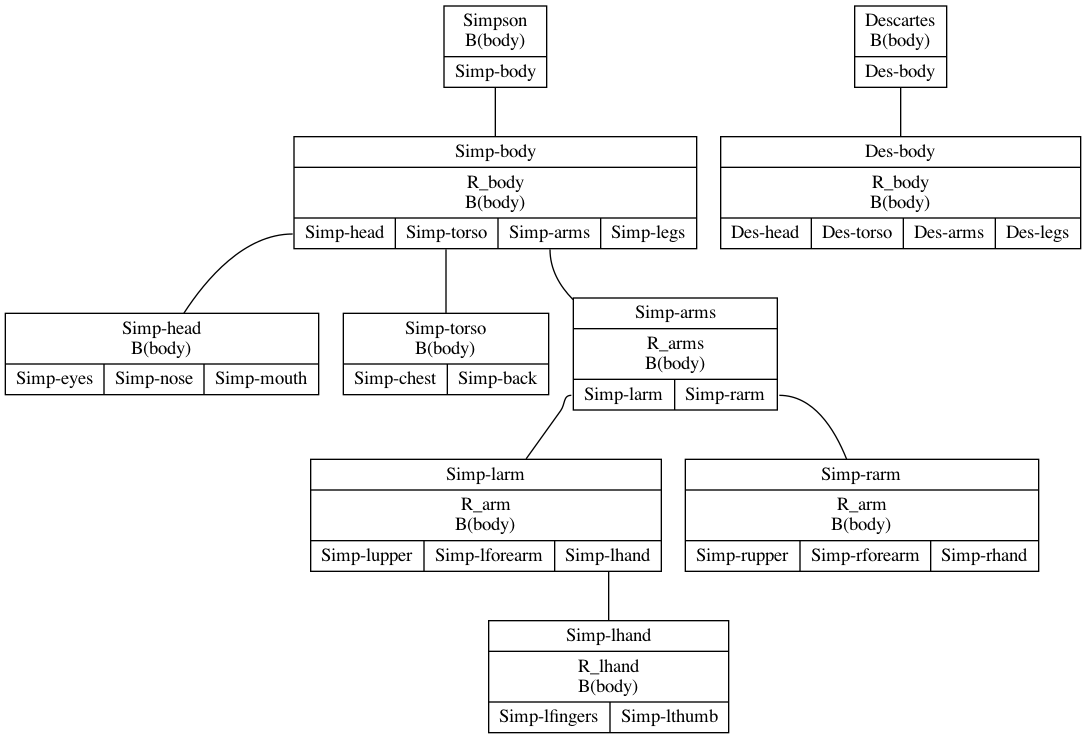

In [13]:
removed_phil_dept_hn = Hypernetwork()
removed_phil_dept_hn.copy(simpson_hn)
removed_phil_dept_hn.delete(B="phil-dept")

print(removed_phil_dept_hn)

draw_hn(removed_phil_dept_hn, fname=simpson_dir+"removed-phil-dept-hn", view=False, show_vertex=False)
Image(filename=simpson_dir+'removed-phil-dept-hn.png', width=800, height=400)